### Predicion of House Sales Prices

Steps:
 
1. Problem statement
2. Data collection
3. Data checks to perform
4. Exploratory data analysis
5. Conclusions from EDA
6. Data preprocessing
7. Model training
8. Choose best model

### 1. Problem Statement

 To predict the sales price for each house provided in the test data

### 2. Data Collection

#### 2.1 Importing required packages and datasets 

Importing required packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 81)

Importing datasets required

In [467]:
train_df= pd.read_csv('train.csv')
test_df= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')

Making copy of training set

In [11]:
a= train_df.copy() 

First 5 rows of the training dataset 

In [13]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Shape of the Dataset

In [15]:
train_df.shape

(1460, 81)

In [16]:
train_df.set_index(train_df['Id'],inplace=True)
train_df.drop(columns=['Id'],inplace=True)

In [17]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


#### 2.2 Dataset Information

Information about the features present is provided in the document "data_description.txt"

### 3. Data Checks to perform:
3.1. Check data types

3.2. Segregation of numerical and categorical features

3.3. Check Duplicates

3.4. Check missing values

3.5. Check the number of unique values of each column

3.6. Check statistics of data set

3.7. Check and treat the outliers

#### 3.1 Check data types`

In [22]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

#### 3.2 Segregation of numerical and categorical features

num_cols represent the numerical features and cat_cols represent the categorical features

In [25]:
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns  # Categorical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns    # Numerical columns

#### 3.3 Check Duplicates

There are no duplicated values in the dataset

In [29]:
train_df.duplicated().sum()

0

#### 3.4 Check missing values

Imputing missing values using fillna in numerical features

In [35]:
for col in num_cols:
    if train_df[col].isnull().sum()!=0:
        train_df[col].fillna(train_df[col].median(),inplace=True)

Imputing missing values using fillna in categorical features

In [40]:
for col in cat_cols:
    if train_df[col].isnull().sum()!=0: 
        train_df[col].fillna(train_df[col].mode()[0],inplace=True)

Checking for missing values after imputing

In [45]:
for col in train_df.columns: 
    if train_df[col].isnull().sum()!=0: 
        print(col,train_df[col].isnull().sum()) 
else:
    print('All missing values are filled')

All missing values are filled


No missing values present in the features

In [48]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

#### 3.5 Check the number of unique values of each column

In [51]:
train_df[cat_cols].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [54]:
train_df[num_cols].nunique()

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

#### 3.6 Check statistics of dataset

In [58]:
train_df[cat_cols].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,1419,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,1317,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,735,1360,1070,951,686,1392,1407,1340,1456,1336,1455,1267,1198


In [59]:
train_df[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 3.7 Check and treat the outliers

In [62]:
def find_and_replace_outliers_z_score(df):
    outliers = {}
    z_scores_dict = {}
    a=df.copy()
    for col in a.select_dtypes(include=[np.number]).columns:
        # Calculate Z-scores for the column
        z_scores= (a[col]-a[col].mean())/a[col].std()

        # Identify outliers as those having a Z-score greater than 3 or less than -3
        outliers_mask= np.abs(z_scores)>3
        outliers_count= outliers_mask.sum()

        # Store the count of outliers in a dictionary
        outliers[col]=outliers_count

        # Replace outliers with the median of the column
        median_value= a[col].median()
        a.loc[outliers_mask,col]=median_value

    return outliers,a

outliers, train_df_no_outliers = find_and_replace_outliers_z_score(train_df)

print("Outliers count per column:")
print(outliers)

Outliers count per column:
{'MSSubClass': 30, 'LotFrontage': 16, 'LotArea': 13, 'OverallQual': 2, 'OverallCond': 28, 'YearBuilt': 6, 'YearRemodAdd': 0, 'MasVnrArea': 32, 'BsmtFinSF1': 6, 'BsmtFinSF2': 50, 'BsmtUnfSF': 11, 'TotalBsmtSF': 10, '1stFlrSF': 12, '2ndFlrSF': 4, 'LowQualFinSF': 20, 'GrLivArea': 16, 'BsmtFullBath': 16, 'BsmtHalfBath': 82, 'FullBath': 0, 'HalfBath': 12, 'BedroomAbvGr': 14, 'KitchenAbvGr': 68, 'TotRmsAbvGrd': 12, 'Fireplaces': 5, 'GarageYrBlt': 2, 'GarageCars': 0, 'GarageArea': 7, 'WoodDeckSF': 22, 'OpenPorchSF': 27, 'EnclosedPorch': 51, '3SsnPorch': 23, 'ScreenPorch': 55, 'PoolArea': 7, 'MiscVal': 8, 'MoSold': 0, 'YrSold': 0, 'SalePrice': 22}


Created another dataframe without outliers while keeping the dataframe with outliers also

### 4. Data Preprocessing

Importing necessary packages

In [72]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [73]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Removing the target variable from numerical features column before transformation

In [75]:
num_cols1= [col for col in num_cols if col!='SalePrice']

Encoding categorical features and scaling numerical features using ColumnTransformer

In [77]:
# Use LabelEncoder for categorical variables and StandardScaler for numerical variables
preprocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols1),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)
 ])

Use Pipeline for consistent transformation of both preprocessing and modeling

In [82]:
pipeline= Pipeline(steps=[('preprocessor',preprocessor)])

Defining X and y

In [86]:
X= train_df.drop(columns=['SalePrice'],axis=1)
y= train_df['SalePrice']

Splitting dataset into traning and testing datasets

In [89]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

Applying the transformations

In [92]:
X_train_transformed= pipeline.fit_transform(X_train)
X_test_transformed= pipeline.transform(X_test)

### 5. Model Training

In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def evaluate(modelname):
    model = modelname
    model.fit(X_train_transformed,y_train)
    y_train_pred= model.predict(X_train_transformed)
    y_test_pred= model.predict(X_test_transformed)
    mae= mean_squared_error(y_test,y_test_pred)
    mse= mean_squared_error(y_test,y_test_pred)
    r2_score_training= r2_score(y_train,y_train_pred)
    r2_score_testing= r2_score(y_test,y_test_pred)

    return mae,mse,r2_score_training,r2_score_testing

models={
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Multi-layer Perceptron Regressor (MLP)': MLPRegressor()
}

def model_evaluation(model_dict):
    model_names=model_dict.keys()
    model_list= list(model_dict.values())
    r2_scores_train=[]
    r2_scores_test=[]
    for i in model_list:
        mae,mse,r2_score_training,r2_score_testing= evaluate(i)
        r2_scores_train.append(r2_score_training)
        r2_scores_test.append(r2_score_testing)
        print(f'for {i} model parameters are:')
        print(f'mean absolute eror:{mae}')
        print(f'mean squared error:{mse}')
        print(f'r2 score training:{r2_score_training}')
        print(f'r2 score testing:{r2_score_testing}')
    
        # Get the number of samples (n) and number of features (p)
        n = X.shape[0]
        p = X.shape[1]
        
        # Calculate Adjusted R²
        adjusted_r2 = 1 - (1 - r2_score_testing) * ((n - 1) / (n - p - 1))
        print(f'adjusted r2:{adjusted_r2}')
        print('------------------------------------------------------------------')
    dict={'Model names': model_names,'R2 score training':r2_scores_train,'R2 scores testing': r2_scores_test}
    df=pd.DataFrame(dict)
    df=df.sort_values(by=['R2 scores testing'],ascending=False)
    return df

In [96]:
model_evaluation(models)

for LinearRegression() model parameters are:
mean absolute eror:873600360.9419032
mean squared error:873600360.9419032
r2 score training:0.935898432170005
r2 score testing:0.8861064917782329
adjusted r2:0.8795865010901751
------------------------------------------------------------------
for Ridge() model parameters are:
mean absolute eror:880119513.2134238
mean squared error:880119513.2134238
r2 score training:0.9222205474153669
r2 score testing:0.8852565732616758
adjusted r2:0.8786879278179601
------------------------------------------------------------------
for Lasso() model parameters are:
mean absolute eror:794252458.3573966
mean squared error:794252458.3573966
r2 score training:0.9358761562592933
r2 score testing:0.8964512803101935
adjusted r2:0.8905234912844727
------------------------------------------------------------------
for ElasticNet() model parameters are:
mean absolute eror:1316250479.3034427
mean squared error:1316250479.3034427
r2 score training:0.8235300998269646
r

,Model names,R2 score training,R2 scores testing
6,Gradient Boosting Regressor,0.968739,0.898507
2,Lasso Regression,0.935876,0.896451
5,Random Forest Regressor,0.976075,0.887675
0,Linear Regression,0.935898,0.886106
1,Ridge Regression,0.922221,0.885257
7,AdaBoost Regressor,0.882443,0.838737
3,ElasticNet Regression,0.823530,0.828397
9,K-Nearest Neighbors Regressor,0.835989,0.803922
4,Decision Tree Regressor,1.000000,0.728969
8,Support Vector Regressor (SVR),-0.044256,-0.024005


### 6. Hyperparameter tuning/ Model optimization using GeridSearchCV

#### Gradient Boosting Regressor

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the base learners
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gbr, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Use mean squared error as the scoring metric
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available cores
                           verbose=1)  # Print progress

# Fit GridSearchCV to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'subsample': 0.9}


In [114]:
r2score_rate=[]
n=[]
for i in range(50,400):
    n.append(i)
    gbr= GradientBoostingRegressor(n_estimators=i)
    gbr.fit(X_train_transformed,y_train)
    y_pred_test= gbr.predict(X_test_transformed)
    a= r2_score(y_test,y_pred_test)
    r2score_rate.append(a)

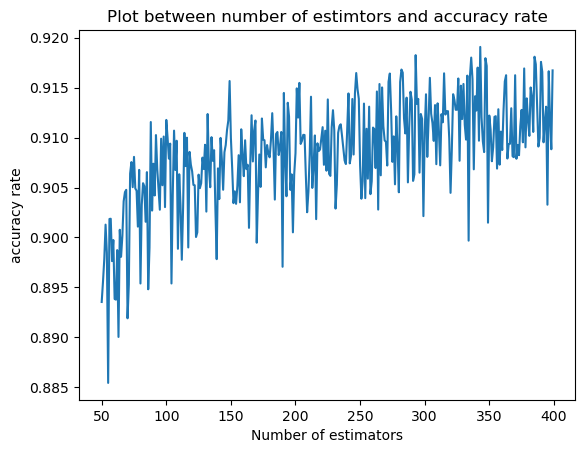

In [117]:
plt.plot(n, r2score_rate)

# Adding labels and title
plt.xlabel('Number of estimators')
plt.ylabel('accuracy rate')
plt.title('Plot between number of estimtors and accuracy rate')

# Display the plot
plt.show()

In [133]:
gbr= GradientBoostingRegressor(n_estimators=150,learning_rate= 0.1, max_depth= 5, min_samples_leaf= 2, min_samples_split= 5, subsample= 0.9)
gbr.fit(X_train_transformed,y_train)
y_train_pred= gbr.predict(X_train_transformed)
y_test_pred= gbr.predict(X_test_transformed)
mae= mean_squared_error(y_test,y_test_pred)
mse= mean_squared_error(y_test,y_test_pred)
r2_score_training= r2_score(y_train,y_train_pred)
r2_score_testing= r2_score(y_test,y_test_pred)
print(r2_score_training)
print(r2_score_testing)

0.9959308060934772
0.9229872833202766


#### Lasso Regression

In [137]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid={
'alpha': np.logspace(-4, 0, 50)
}
lasso=Lasso()
grid_search= GridSearchCV( estimator=lasso,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R² as the scoring metric
    verbose=2,  # Display progress during fitting
    n_jobs=-1  # Use all available CPUs
                         )
grid_search.fit(X_train_transformed,y_train)
# Get the best hyperparameters
print("Best Hyperparameter (alpha):", grid_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameter (alpha): {'alpha': 1.0}


In [193]:
lasso= Lasso(alpha=30)
lasso.fit(X_train_transformed,y_train)
y_train_pred= lasso.predict(X_train_transformed)
y_test_pred= lasso.predict(X_test_transformed)
mae= mean_squared_error(y_test,y_test_pred)
mse= mean_squared_error(y_test,y_test_pred)
r2_score_training= r2_score(y_train,y_train_pred)
r2_score_testing= r2_score(y_test,y_test_pred)
print(r2_score_training)
print(r2_score_testing)

0.9297391353195641
0.8992213584539164


In [197]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


### 7. Test dataframe Results

Dropping irrelevant columns

In [469]:
test_df.drop(columns=['Id'],inplace=True)

Checking for missing values in test dataframe

In [472]:
test_df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

Imputing missing values in test dataframe for numerical features

In [475]:
for col in num_cols1:
    if test_df[col].isnull().sum()!=0:
        test_df[col].fillna(test_df[col].median(),inplace=True)

Imputing missing values in test dataframe for categorical features

In [478]:
for col in cat_cols:
    if test_df[col].isnull().sum()!=0:
        test_df[col].fillna(test_df[col].mode()[0],inplace=True)

Using preprocessing pipeline on test dataframe

In [481]:
pipeline.fit(X_train)
test_df_transformed= pipeline.transform(test_df)

Initalizing, fitting and giving predictions using the model

In [484]:
gbr= GradientBoostingRegressor(n_estimators=150,learning_rate= 0.1, max_depth= 5, min_samples_leaf= 2, min_samples_split= 5, subsample= 0.9)
gbr.fit(X_train_transformed,y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                          n_estimators=150, subsample=0.9)

In [485]:
y_prediction_testdf= gbr.predict(test_df_transformed)
y_prediction_testdf=pd.Series(y_prediction_testdf)

creating submission dataframe and csv file

In [487]:
submission_dict={'Id': sample_submission['Id'],'SalePrice':y_prediction_testdf.round(0)}
submission_df=pd.DataFrame(submission_dict)
submission_df

,Id,SalePrice
0,1461,126776.0
1,1462,157030.0
2,1463,180595.0
3,1464,190509.0
4,1465,188498.0
...,...,...
1454,2915,84491.0
1455,2916,81697.0
1456,2917,167189.0
1457,2918,121462.0


In [488]:
meow= submission_df.copy()

In [489]:
submission_df.to_csv('submission.csv',index=False)